# What are Convolutional Neural Networks?

Convolutional Neural Networks (ConvNets or CNNs) are a category of Neural Networks that have proven very effective in areas such as image recognition and classification. ConvNets have been successful in identifying faces, objects and traffic signs apart from powering vision in robots and self driving cars.


A Convolutional Neural Network (CNN) is comprised of one or more convolutional layers (often with a subsampling step) and then followed by one or more fully connected layers as in a standard multilayer neural network. The architecture of a CNN is designed to take advantage of the 2D structure of an input image (or other 2D input such as a speech signal). This is achieved with local connections and tied weights followed by some form of pooling which results in translation invariant features. Another benefit of CNNs is that they are easier to train and have many fewer parameters than fully connected networks with the same number of hidden units. In this article we will discuss the architecture of a CNN and the back propagation algorithm to compute the gradient with respect to the parameters of the model in order to use gradient based optimization. 

CNN was propsed by Yan LeCunn in year 1980.When we have inputs in the form of images,videos,frames,pixels we need CNN.

The task which we can perform with CNN are
1)Image Classification.
2)Object Detection
3)Open Pose
4)GAN
5)Masked Images







# Why ANN cannot be used for CNN tasks?
ANN needs inputs and outputs in the form of tabluar data.

Images are represented by some pixels and for human brain to classify images many complex process like convolution,feature detection happens.Lets say we have rose flower and lotus flower.If rose flower is made inverted and given to human,human will be able to detect that it is rose flower.However if we train ANN on uninverted images of rose and in testing if inverted image came,ANN will be detetcting it as different image but logically they are same images.

Hence ANN is sensitive towards any changes that are happening to images and hence cannot be ued for Computer vision tasks.

# Types of images
1)Grey Scale Image

The value of pixel range between 0 to 255. 
0 represents black pixel.
255 represnts white pixel.

In this kind of images we have only 1 channel.Channel represent color component of iamge

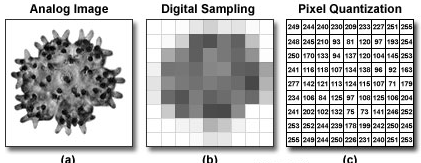

2) RGB Image

Here 3 channels are present i.e Red Green Blue and they are primary color.
When 3 channels are combined we will get RGB images.

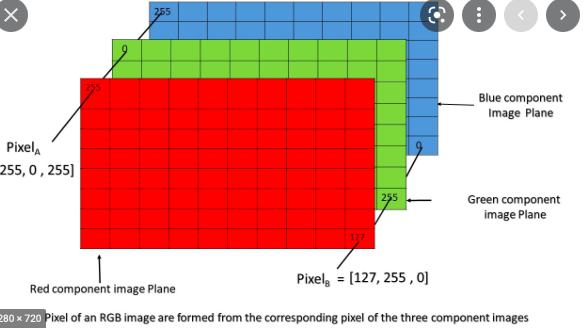

In [ ]:
Colour picker

Image size= IMAGE WIDTH X IMAGE HEIGHT X CHANNEL


# CONVOLUTION OPERATION IMAGES

Convolution is mathematical operation which helps in detetcting edges,shapes from given images.

When convolution is applied on images, certain types of filters are used to convolute on image and hence we get required feature.

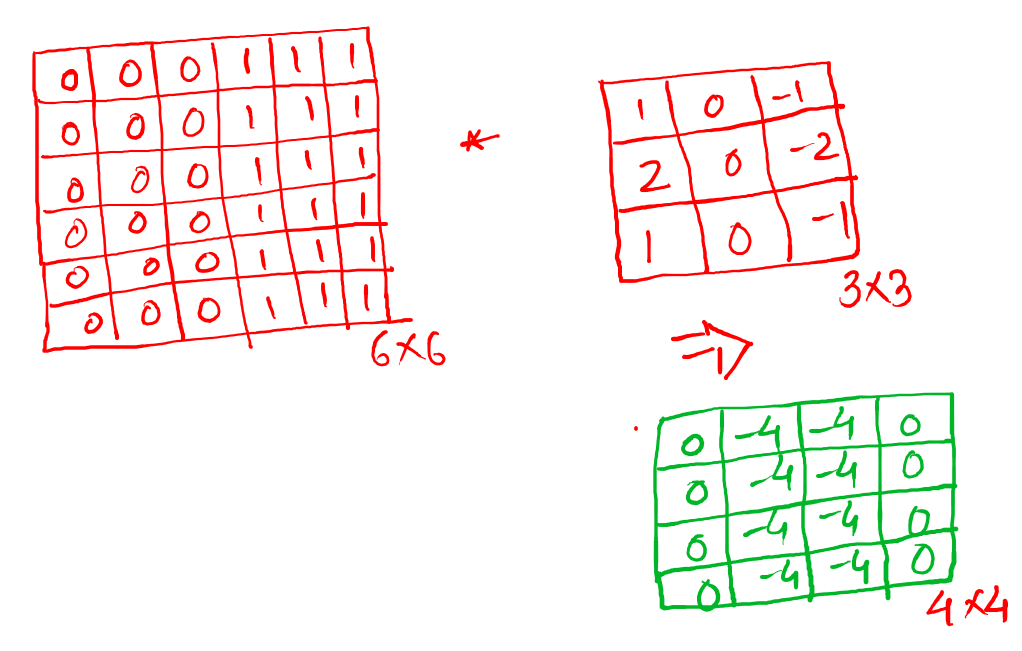

Let's considerwe have greyscale image of size 6x6.
Here we are applying filter called as Vertical edge detector or Sobel fiter to identify edges in the image.
The filter will hover over entire image and following mathemetical calculation will happen.
((0x1)+(1x0)+(0x-1)+(0x2)+(0x0)+(0x-2)+(0x1)+(0x0)+(0x-1)=0.

We will move filter which is called as stride(jump) on each pixel and finally we will get output of 4X4.

So when we pass 6x6 image through vertical edge detector filter (3x3),the output will result dark portion whereeve th edeges are present.

The formula for size of output image 

(n-f+1)x(n-f+1)

where n=original image size
f=filter size.

There are many filter available to detect various features in an image.
The values are initialized randomly and with the help of backpropogation, the values of filter will be updated.


Once the filter is applied, the features are collected with help of Relu.This is convolution operation. 

# Padding

![](https://d17h27t6h515a5.cloudfront.net/topher/2016/November/5837d4d5_screen-shot-2016-11-24-at-10.05.37-pm/screen-shot-2016-11-24-at-10.05.37-pm.png)
<center>A 5x5 grid with a 3x3 filter. Source: Andrej Karpathy.</center>

Let's say we have a `5x5` grid (as shown above) and a filter of size `3x3` with a stride of `1`. What's the width and height of the next layer? We see that we can fit at most three patches in each direction, giving us a dimension of `3x3` in our next layer. As we can see, the width and height of each subsequent layer decreases in such a scheme.

In an ideal world, we'd be able to maintain the same width and height across layers so that we can continue to add layers without worrying about the dimensionality shrinking and so that we have consistency. How might we achieve this? One way is to simple add a border of `0`s to our original `5x5` image. You can see what this looks like in the below image:

![](https://d17h27t6h515a5.cloudfront.net/topher/2016/November/5837d4ee_screen-shot-2016-11-24-at-10.05.46-pm/screen-shot-2016-11-24-at-10.05.46-pm.png)
<center>The same grid with 0 padding. Source: Andrej Karpathy.</center>

This would expand our original image to a `7x7`. With this, we now see how our next layer's size is again a `5x5`, keeping our dimensionality consistent.

Given our input layer has a volume of `W`, our filter has a volume `(height * width * depth)` of `F`, we have a stride of `S`, and a padding of `P`, the following formula gives us the volume of the next layer: `(W−F+2P)/S+1`.

# Python Implementation



In [ ]:
import numpy as np
from tensorflow import keras
from tensorflow.keras import layers

# Problem Statement: To classify whether the given image is dog or cat

To connect Google Drive (GDrive) with Colab

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


**Extracting the data**

- unzip the zip file on google colab and save it in a new folder

In [2]:
# execute this only once... if you run again, skip this part
import zipfile
with zipfile.ZipFile("/content/drive/MyDrive/CDS-19-DL-Foundation-Course-on-CNN/train.zip", 'r') as zip_ref:        # get the path for train.zip using copypath. paste the link within the quotation
     # creates new folder 'cats_dogs_images' and saves all images present in train.zip
    zip_ref.extractall("/content/drive/MyDrive/CDS-19-DL-Foundation-Course-on-CNN/cats_dogs_images")  # create a new folder, rename it and get the path of it using copypath.. paste the link here
    
   

**Copying images to training, validation, and test directories**

create subset for train, validation and test

In [3]:
# execute this only once.. if you run again, skip this part

import os, shutil, pathlib

original_dir = pathlib.Path("/content/drive/MyDrive/CDS-19-DL-Foundation-Course-on-CNN/cats_dogs_images/train") # get the path of train folder in cats_dogs_images using copypath and paste the link here
new_base_dir = pathlib.Path("/content/drive/MyDrive/CDS-19-DL-Foundation-Course-on-CNN/cats_dogs_images/image_seggrated") # create a new folder, rename it and get the path using copypath and paste the link here.


# define a function to create subsets for train, test and validation
def make_subset(subset_name, start_index, end_index): 
    for category in ("cat", "dog"):
        dir = new_base_dir / subset_name / category
        os.makedirs(dir)   
        fnames = [f"{category}.{i}.jpg" for i in range(start_index, end_index)]
        for fname in fnames:
            shutil.copyfile(src=original_dir / fname,
                            dst=dir / fname)

# calling the function thrice to create 3 subsets. 
make_subset("train", start_index=0, end_index=1000)
make_subset("validation", start_index=1000, end_index=1500)
make_subset("test", start_index=1500, end_index=2500)

Building the model: 
Instantiating a small convnet for dogs vs. cats classification  


Sequential and Functional are two ways to build Keras models. 

Sequential model is simplest type of model, a linear stock of layers. The sequential API allows you to create models layer-by-layer for most problems. It is limited in that it does not allow you to create models that share layers or have multiple inputs or outputs.

The functional API in Keras is an alternate way of creating models that offers a lot more flexibility, including creating more complex models. In Functional model, part or all of the inputs directly connected to the output layer. This architecture makes it possible for the neural network to learn both deep patterns and simple rules.

In [4]:
# here we use Functional API to create a model
from tensorflow import keras
from tensorflow.keras import layers

inputs = keras.Input(shape=(180, 180, 3))
x = layers.Rescaling(1./255)(inputs)
x = layers.Conv2D(filters=32, kernel_size=3, activation="relu")(x)
x = layers.MaxPooling2D(pool_size=2)(x)
x = layers.Conv2D(filters=64, kernel_size=3, activation="relu")(x)
x = layers.MaxPooling2D(pool_size=2)(x)
x = layers.Conv2D(filters=128, kernel_size=3, activation="relu")(x)
x = layers.MaxPooling2D(pool_size=2)(x)
x = layers.Conv2D(filters=256, kernel_size=3, activation="relu")(x)
x = layers.MaxPooling2D(pool_size=2)(x)
x = layers.Conv2D(filters=256, kernel_size=3, activation="relu")(x)
x = layers.Flatten()(x)
outputs = layers.Dense(1, activation="sigmoid")(x)
model = keras.Model(inputs=inputs, outputs=outputs)

In [ ]:
model.summary()

Configuring the model for training

In [5]:
model.compile(loss="binary_crossentropy",
              optimizer="rmsprop",
              metrics=["accuracy"])

Data preprocessing
Using image_dataset_from_directory to read images

image_dataset_from_directory - yields batches of images from the subdirectories class_a and class_b, together with labels 0 and 1 

In [6]:
from tensorflow.keras.utils import image_dataset_from_directory

train_dataset = image_dataset_from_directory(
    new_base_dir / "train",
    image_size=(180, 180),
    batch_size=32)
validation_dataset = image_dataset_from_directory(
    new_base_dir / "validation",
    image_size=(180, 180),
    batch_size=32)
test_dataset = image_dataset_from_directory(
    new_base_dir / "test",
    image_size=(180, 180),
    batch_size=32)

Found 2000 files belonging to 2 classes.
Found 1000 files belonging to 2 classes.
Found 2000 files belonging to 2 classes.


Fitting the model using a Dataset

Callback to save the Keras model or model weights at some frequency. ModelCheckpoint callback is used in conjunction with training using model.fit () to save a model or weights (in a checkpoint file) at some interval, so the model or weights can be loaded later to continue the training from the state saved.

In [7]:
callbacks = [
    keras.callbacks.ModelCheckpoint(
        filepath="convnet_from_scratch.keras", # path to save the model file
        save_best_only=True,
        monitor="val_loss")
]
history = model.fit(
    train_dataset,
    epochs=3,
    validation_data=validation_dataset,
    callbacks=callbacks)

Epoch 1/3
63/63 [==============================] - 20s 128ms/step - loss: 0.7112 - accuracy: 0.5280 - val_loss: 0.7037 - val_accuracy: 0.5000
Epoch 2/3
63/63 [==============================] - 7s 108ms/step - loss: 0.6987 - accuracy: 0.5735 - val_loss: 0.6718 - val_accuracy: 0.6100
Epoch 3/3
63/63 [==============================] - 8s 112ms/step - loss: 0.6647 - accuracy: 0.6090 - val_loss: 0.6875 - val_accuracy: 0.5740


Displaying curves of loss and accuracy during training

In [ ]:
import matplotlib.pyplot as plt
accuracy = history.history["accuracy"]
val_accuracy = history.history["val_accuracy"]
loss = history.history["loss"]
val_loss = history.history["val_loss"]
epochs = range(1, len(accuracy) + 1)
plt.plot(epochs, accuracy, "r", label="Training accuracy")
plt.plot(epochs, val_accuracy, "b", label="Validation accuracy")
plt.title("Training and validation accuracy")
plt.xlabel("epochs")
plt.ylabel("accuracy")
plt.legend()
plt.figure()
plt.plot(epochs, loss, "r", label="Training loss")
plt.plot(epochs, val_loss, "b", label="Validation loss")
plt.title("Training and validation loss")
plt.xlabel("epochs")
plt.ylabel("loss")
plt.legend()
plt.show()

Evaluating the model on the test set

In [ ]:
test_model = keras.models.load_model("convnet_from_scratch.keras")
test_loss, test_acc = test_model.evaluate(test_dataset)
print(f"Test accuracy: {test_acc:.3f}")

In [10]:
import tensorflow
img = keras.preprocessing.image.load_img(
    "/content/Unknown-3", target_size=(180,180,3)
)
img_array = keras.preprocessing.image.img_to_array(img)
img_array = tensorflow.expand_dims(img_array, 0)  # Create batch axis

predictions = model.predict(img_array)
score = predictions[0]
print(
    "This image is %.2f percent cat and %.2f percent dog."
    % (100 * (1 - score), 100 * score)
)

This image is 60.75 percent cat and 39.25 percent dog.


In [9]:
score


array([0.3757948], dtype=float32)